In [83]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [84]:
%cd /content/drive/MyDrive/CS5344_diagram

/content/drive/.shortcut-targets-by-id/1qv98RuFSnwoCbo22L7F1IsVtbRQ9esTo/CS5344_diagram


# 1. Import the necessary library

In [85]:
import networkx as nx
import os
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

# allowing the plot in line for seaborn
%matplotlib inline
plt.style.use('seaborn')

# enabling outlines line in histogram
plt.rcParams["patch.force_edgecolor"] = True

from networkx.algorithms.community.quality import coverage, modularity

import re # for regular expressions
import pandas as pd 
pd.set_option("display.max_colwidth", 200)
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk # for text manipulation
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline
import pandas as pd
import re
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from textblob import Word
import nltk
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
sns.set_style("whitegrid", {'axes.grid' : False})

import re
import string
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import nltk
from nltk.corpus import stopwords

from tqdm import tqdm
import os
import nltk
import spacy
import random
from spacy.util import compounding
from spacy.util import minibatch

import warnings
warnings.filterwarnings("ignore")

# 2. Read diagram

In [86]:
vax_dig = nx.read_gml('/content/drive/MyDrive/CS5344_diagram/graph_reply/sin1/Final_DiGraph_sentiment_Vax.gml')

In [87]:
data = list(vax_dig.nodes.data())

In [88]:
data[0]

('rtolarz',
 {'sentiment': 0.0,
  'sentimentComm': 1,
  'tweet': '#aşı #AsıYanetki #asımağdurları #ZorunluAsıyaHayır #BioNTechpfizer #Biontech #sinovac #sinovacvaccine #mRNA  https://t.co/nNc7azPcLU'})

In [89]:
tweet = []
for i in data:
  if('tweet' in i[1]):
    tweet.append(i[1]['tweet'])

In [90]:
com = []
for i in data:
  if('tweet' in i[1]):
    com.append(i[1]['sentimentComm'])

In [91]:
tweet_df = pd.DataFrame(tweet, columns=['Text'])
com_df = pd.DataFrame(com, columns=['Com'])
final = pd.concat([tweet_df,com_df], axis=1)

In [92]:
final2=final.copy()

# 3. Perofrm data cleaning

In [93]:
import string

import nltk
from nltk.corpus import stopwords
from nltk import re

MIN_YEAR = 1900
MAX_YEAR = 2100


def get_url_patern():
    return re.compile(
        r'(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))'
        r'[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9]\.[^\s]{2,})')


def get_emojis_pattern():
    try:
        # UCS-4
        emojis_pattern = re.compile(u'([\U00002600-\U000027BF])|([\U0001f300-\U0001f64F])|([\U0001f680-\U0001f6FF])')
    except re.error:
        # UCS-2
        emojis_pattern = re.compile(
            u'([\u2600-\u27BF])|([\uD83C][\uDF00-\uDFFF])|([\uD83D][\uDC00-\uDE4F])|([\uD83D][\uDE80-\uDEFF])')
    return emojis_pattern


def get_hashtags_pattern():
    return re.compile(r'#\w*')


def get_single_letter_words_pattern():
    return re.compile(r'(?<![\w\-])\w(?![\w\-])')


def get_blank_spaces_pattern():
    return re.compile(r'\s{2,}|\t')


def get_twitter_reserved_words_pattern():
    return re.compile(r'(RT|rt|FAV|fav|VIA|via)')


def get_mentions_pattern():
    return re.compile(r'@\w*')


def is_year(text):
    if (len(text) == 3 or len(text) == 4) and (MIN_YEAR < len(text) < MAX_YEAR):
        return True
    else:
        return False


class TwitterPreprocessor:

    def __init__(self, text: str):
        self.text = text

    def fully_preprocess(self):
        return self \
            .remove_urls() \
            .remove_mentions() \
            .remove_hashtags() \
            .remove_twitter_reserved_words() \
            .remove_punctuation() \
            .remove_single_letter_words() \
            .remove_blank_spaces() \
            .remove_stopwords() \
            .remove_numbers()

    def remove_urls(self):
        self.text = re.sub(pattern=get_url_patern(), repl='', string=self.text)
        return self

    def remove_punctuation(self):
        self.text = re.sub(r'[^\w\s\d]', '', self.text)
        return self

    def remove_mentions(self):
        self.text = re.sub(pattern=get_mentions_pattern(), repl='', string=self.text)
        return self

    def remove_hashtags(self):
        self.text = re.sub(pattern=get_hashtags_pattern(), repl='', string=self.text)
        return self

    def remove_twitter_reserved_words(self):
        self.text = re.sub(pattern=get_twitter_reserved_words_pattern(), repl='', string=self.text)
        return self

    def remove_single_letter_words(self):
        self.text = re.sub(pattern=get_single_letter_words_pattern(), repl='', string=self.text)
        return self

    def remove_blank_spaces(self):
        self.text = re.sub(pattern=get_blank_spaces_pattern(), repl=' ', string=self.text)
        return self

    def remove_stopwords(self, extra_stopwords=None):
        if extra_stopwords is None:
            extra_stopwords = []
        text = nltk.word_tokenize(self.text)
        stop_words = set(stopwords.words('english'))

        new_sentence = []
        for w in text:
            if w not in stop_words and w not in extra_stopwords:
                new_sentence.append(w)
        self.text = ' '.join(new_sentence)
        return self

    def remove_numbers(self, preserve_years=False):
        text_list = self.text.split(' ')
        for text in text_list:
            if text.isnumeric():
                if preserve_years:
                    if not is_year(text):
                        text_list.remove(text)
                else:
                    text_list.remove(text)

        self.text = ' '.join(text_list)
        return self

    def lowercase(self):
        self.text = self.text.lower()
        return self
    
    def lemmatization(self):
      nltk.download('wordnet')
      self.text= self.text.apply(lambda x:" ".join([Word(word).lemmatize() for word in x.split()]))
    

In [94]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [95]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [96]:
# Clean tweets and append to new column
tweets = final['Text']
clean_tweets = []
for tweet in tweets:
    c = TwitterPreprocessor((tweet))
    c.fully_preprocess()
    c = c.text
    clean_tweets.append(c)
    
final['clean_Text'] = clean_tweets 
final.head(5)

Text  \
0                                                                     #aşı #AsıYanetki #asımağdurları #ZorunluAsıyaHayır #BioNTechpfizer #Biontech #sinovac #sinovacvaccine #mRNA  https://t.co/nNc7azPcLU   
1                                                                                                                Sinovac Vaccine Falls Short of Expectations, But Options Limited  https://t.co/cm7o73LzQC   
2                     @bkkaussie @latikambourke Many Thai doctors are now calling for an end to Sinovac (no proven immunity to Delta, Beta strains) &amp; call on the gov’t to focus on the mRNA vaccines.   
3  NEW  WHO calls on countries exempting vaccinated travellers to recognise all WHO-approved jabs.   Significant implications for Australians jabbed abroad with non-TGA approved vaccines like China's...   
4  @DOHgovph Hello, good morning. Is it possible to have different brands of vaccine na ituturok? Like Sinovac 1st dose, and 2nd dose is another brand? Considering that person is in another LGU for 2...   

   Com  \
0    1   
1    1   
2    0   
3    0   
4    1   

                                                                                                                                                                                     clean_Text  
0                                                                                                                                                                                                
1                                                                                                                                    Sinovac Vaccine Falls Sho Expectations But Options Limited  
2                                                                                    Many Thai doctors calling end Sinovac proven immunity Delta Beta strains amp call govt focus mRNA vaccines  
3  NEW WHO calls countries exempting vaccinated travellers recognise WHOapproved jabs Significant implications Australians jabbed abroad nonTGA approved vaccines like Chinas Sinopharm Sinovac  
4            Hello good morning Is possible different brands vaccine na ituturok Like Sinovac 1st dose 2nd dose another brand Considering person another LGU 2nd dose available vaccine Sinovac

In [97]:
final['clean_Text'] = final['clean_Text'].apply(lambda x: re.sub('[^A-Za-z0-9\s]+','', x))

In [98]:
final

Text  \
0                                                                        #aşı #AsıYanetki #asımağdurları #ZorunluAsıyaHayır #BioNTechpfizer #Biontech #sinovac #sinovacvaccine #mRNA  https://t.co/nNc7azPcLU   
1                                                                                                                   Sinovac Vaccine Falls Short of Expectations, But Options Limited  https://t.co/cm7o73LzQC   
2                        @bkkaussie @latikambourke Many Thai doctors are now calling for an end to Sinovac (no proven immunity to Delta, Beta strains) &amp; call on the gov’t to focus on the mRNA vaccines.   
3     NEW  WHO calls on countries exempting vaccinated travellers to recognise all WHO-approved jabs.   Significant implications for Australians jabbed abroad with non-TGA approved vaccines like China's...   
4     @DOHgovph Hello, good morning. Is it possible to have different brands of vaccine na ituturok? Like Sinovac 1st dose, and 2nd dose is another brand? Considering that person is in another LGU for 2...   
...                                                                                                                                                                                                       ...   
4803  Chareluck Santos, Head Nurse of UP Health Service, says she is proud to have been chosen as the vaccinator of PGH Director Gap Legaspi, the first PGH employee to receive CoronaVac (Sinovac) vaccin...   
4804  If SINOVAC is unsafe then why there are 17 countries who purchased and trust the CHINESE VACCINE.  Therefore the Vaccine is not the problem, the problem here are the peoples mind who insisted that...   
4805                    Paalala ko lang Sinovac din ginamit ni Pres Widodo. Presidente yan ha pero hindi naginarte kagaya nyo.  Social justice warrior daw pero gusto ng special treatment sa vaccine. Char 😂   
4806  US doubting the 74% efficacy of J&amp;J COVID-19 vaccine while Philippines welcoming the 50% something efficacy of Sinovac, says so many about the Philippine government under the dictatorship of D...   
4807  The DDS script now that vaccinations have begun:  "Stop complaining. Other countries are also using SinoVac. "  Just to set the record straight, we had the opportunity to procure more effective an...   

      Com  \
0       1   
1       1   
2       0   
3       0   
4       1   
...   ...   
4803    1   
4804    1   
4805    1   
4806    1   
4807    0   

                                                                                                                                                                                                   clean_Text  
0                                                                                                                                                                                                              
1                                                                                                                                                  Sinovac Vaccine Falls Sho Expectations But Options Limited  
2                                                                                                  Many Thai doctors calling end Sinovac proven immunity Delta Beta strains amp call govt focus mRNA vaccines  
3                NEW WHO calls countries exempting vaccinated travellers recognise WHOapproved jabs Significant implications Australians jabbed abroad nonTGA approved vaccines like Chinas Sinopharm Sinovac  
4                          Hello good morning Is possible different brands vaccine na ituturok Like Sinovac 1st dose 2nd dose another brand Considering person another LGU 2nd dose available vaccine Sinovac  
...                                                                                                                                                                                                       ...  
4803  Chareluck Santos Head Nurse UP Health Service says proud chosen vaccinato

# 4. Divide into two Community

In [99]:
#Group1
Com1_all = final[final['Com']==0]
#Group2
Com2_all = final[final['Com']==1]

# 5. Comunity1

In [100]:
Com1_all.head()

Text  \
2                      @bkkaussie @latikambourke Many Thai doctors are now calling for an end to Sinovac (no proven immunity to Delta, Beta strains) &amp; call on the gov’t to focus on the mRNA vaccines.   
3   NEW  WHO calls on countries exempting vaccinated travellers to recognise all WHO-approved jabs.   Significant implications for Australians jabbed abroad with non-TGA approved vaccines like China's...   
6                                                        @T13 Chinos qlos🖕🖕 y su cagah de #ChantaVac 🇨🇳🇨🇳 compren más Pfizer los wns @GobiernodeChile y liquiden esa weaa de #sinovacvaccine  pah otro pais   
11  @deomacalmaRH Dumating na kahapon ang 600,000 Sinovac #COVID19 vaccines na donasyon ng China. Hudyat ito ng mass vaccination sa bansa na sisimulan ngayong araw. | via RH30 @liezel_once #FactsNFigu...   
12  @thinking_manc @Swen_2017 @Semyaza666 @MarbleMenno @BoukjevdBerg @vonderleyen Astrazeneca vaccine is not even the cheapest out there. You have CanSino (single dose), Sinovac, indian Covaxin, proba...   

    Com  \
2     0   
3     0   
6     0   
11    0   
12    0   

                                                                                                                                                                                      clean_Text  
2                                                                                     Many Thai doctors calling end Sinovac proven immunity Delta Beta strains amp call govt focus mRNA vaccines  
3   NEW WHO calls countries exempting vaccinated travellers recognise WHOapproved jabs Significant implications Australians jabbed abroad nonTGA approved vaccines like Chinas Sinopharm Sinovac  
6                                                                                                           Chinos qlos su cagah de compren ms Pfizer los wns liquiden esa weaa de pah otro pais  
11                                                    Dumating na kahapon ang Sinovac vaccines na donasyon ng China Hudyat ito ng mass vaccination sa bansa na sisimulan ngayong araw RH30 WATCH  
12                                                          Astrazeneca vaccine even cheapest You CanSino single dose Sinovac indian Covaxin probably soon Soberana2 Abdala MadisaCuban vaccines

In [101]:
Com1 = Com1_all.drop(columns=['Text'])

## 5.1 Perform TF-IDF for each word

In [102]:
from sklearn.feature_extraction.text import TfidfVectorizer
def TF_IDF(Y):
  vectorizer = TfidfVectorizer()
  X = vectorizer.fit_transform(Y['clean_Text'])
  feature_names = vectorizer.get_feature_names()
  dense = X.todense()
  list1 = dense.tolist()
  df = pd.DataFrame(list1, columns=feature_names)
  df2 = pd.DataFrame(df.T.sum(axis=1),columns=['weight'])
  df3 = df2.sort_values(by=['weight'],ascending=False)
  return df3

In [103]:
df_com1 = TF_IDF(Com1)

In [104]:
df_com1.head()

weight
vaccine   100.270052
sinovac    94.480823
vaccines   63.485115
covid19    44.085758
ng         39.627885

In [105]:
df_com1.reset_index(level=0, inplace=True)

In [106]:
df_com1.head(5)

index      weight
0   vaccine  100.270052
1   sinovac   94.480823
2  vaccines   63.485115
3   covid19   44.085758
4        ng   39.627885

In [107]:
df_com1.columns=['Word','Weight']

In [108]:
df_com1.head()

Word      Weight
0   vaccine  100.270052
1   sinovac   94.480823
2  vaccines   63.485115
3   covid19   44.085758
4        ng   39.627885

## 5.2 Sentiment Analysis for each word

In [109]:
from textblob import TextBlob
def get_polarity(text):
  return TextBlob(text).sentiment.polarity

In [110]:
df_com1['Polarity'] = df_com1['Word'].apply(get_polarity)

In [111]:
df_com1

Word      Weight  Polarity
0       vaccine  100.270052       0.0
1       sinovac   94.480823       0.0
2      vaccines   63.485115       0.0
3       covid19   44.085758       0.0
4            ng   39.627885       0.0
...         ...         ...       ...
7615       idhr    0.123761       0.0
7616         ye    0.123761       0.0
7617     multan    0.123761       0.0
7618  covidecia    0.123761       0.0
7619     equall    0.123761       0.0

[7620 rows x 3 columns]

### 5.2.1 Sentiment for word

In [112]:
df_com1['Sentiment_Type']=''
df_com1.loc[df_com1.Polarity>0,'Sentiment_Type']='POSITIVE'
df_com1.loc[df_com1.Polarity==0,'Sentiment_Type']='NEUTRAL'
df_com1.loc[df_com1.Polarity<0,'Sentiment_Type']='NEGATIVE'

In [113]:
Pos = df_com1.loc[df_com1.Sentiment_Type=='POSITIVE'][0:100]
Neg = df_com1.loc[df_com1.Sentiment_Type=='NEGATIVE'][0:100]
Neu = df_com1.loc[df_com1.Sentiment_Type=='NEUTRAL'][1:101]

In [114]:
Pos = Pos[['Word','Weight']]
Neg = Neg[['Word','Weight']]
Neu = Neu[['Word','Weight']]

In [115]:
Pos.to_csv('/content/drive/MyDrive/CS5344_WordCloud/s1/mention/com1/pos.csv') 
Neg.to_csv('/content/drive/MyDrive/CS5344_WordCloud/s1/mention/com1/neg.csv') 
Neu.to_csv('//content/drive/MyDrive/CS5344_WordCloud/s1/mention/com1/neu.csv')

### 5.2.2 Sentiment for tweet

In [116]:
Com1_all['Polarity'] = Com1_all['clean_Text'].apply(get_polarity)

In [117]:
Com1_all['Sentiment_Type']=''
Com1_all.loc[Com1_all.Polarity>0,'Sentiment_Type']='POSITIVE'
Com1_all.loc[Com1_all.Polarity==0,'Sentiment_Type']='NEUTRAL'
Com1_all.loc[Com1_all.Polarity<0,'Sentiment_Type']='NEGATIVE'

## 5.3 Analyze the Polarity information

In [118]:
def random_colours(number_of_colors):
    '''
    Simple function for random colours generation.
    Input:
        number_of_colors - integer value indicating the number of colours which are going to be generated.
    Output:
        Color in the following format: ['#E86DA4'] .
    '''
    colors = []
    for i in range(number_of_colors):
        colors.append("#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]))
    return colors

### 5.3.1 For Word

In [119]:
temp = df_com1.groupby('Sentiment_Type').count()['Word'].reset_index().sort_values(by='Word',ascending=False)
temp.style.background_gradient(cmap='Purples')

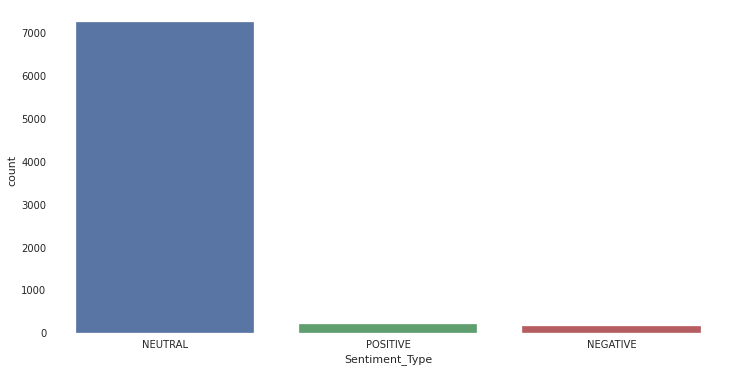

In [120]:
plt.figure(figsize=(12,6))
sns.countplot(x='Sentiment_Type',data=df_com1)

In [121]:
fig = go.Figure(go.Funnelarea(
    text =temp.Sentiment_Type,
    values = temp.Word,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

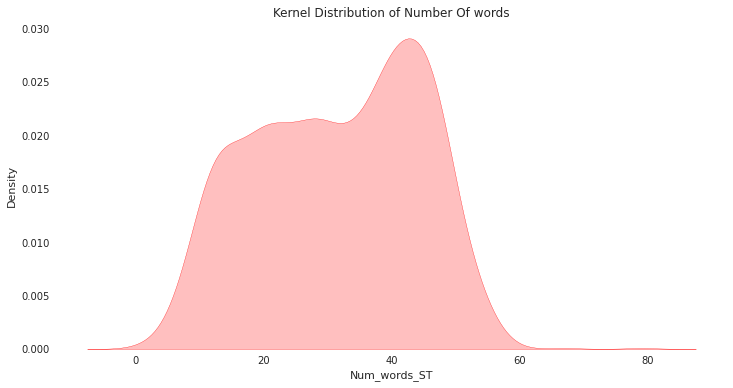

In [122]:
df_com1['Num_words_ST'] = Com1_all['Text'].apply(lambda x:len(str(x).split()))
plt.figure(figsize=(12,6))
p1=sns.kdeplot(df_com1['Num_words_ST'], shade=True, color="r").set_title('Kernel Distribution of Number Of words')

In [123]:
df2 = df_com1.copy()

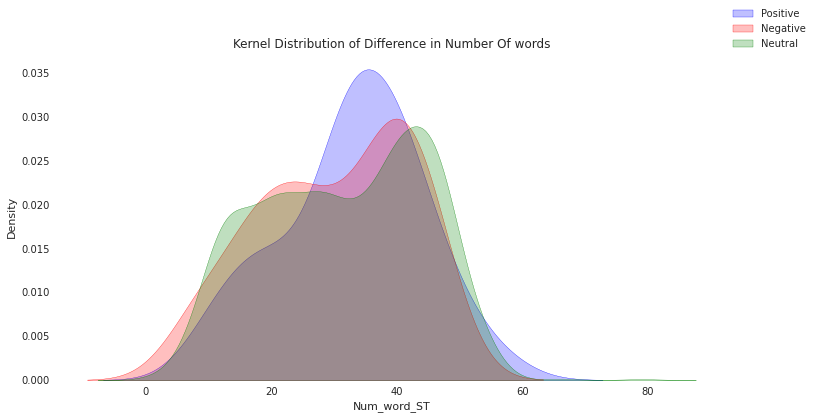

In [124]:
df2.columns=['Word','Weight','Polarity','sentiment','Num_word_ST']
fig = plt.figure(figsize=(12,6))
p1=sns.kdeplot(df2[df2['sentiment']=='POSITIVE']['Num_word_ST'], shade=True, color="b").set_title('Kernel Distribution of Difference in Number Of words')
p2=sns.kdeplot(df2[df2['sentiment']=='NEGATIVE']['Num_word_ST'], shade=True, color="r")
p3=sns.kdeplot(df2[df2['sentiment']=='NEUTRAL']['Num_word_ST'], shade=True, color="g")
fig.legend(labels=["Positive",'Negative','Neutral'])

### 5.3.2 For tweet

In [125]:
temp2 = Com1_all.groupby('Sentiment_Type').count()['clean_Text'].reset_index().sort_values(by='clean_Text',ascending=False)
temp2.style.background_gradient(cmap='Purples')

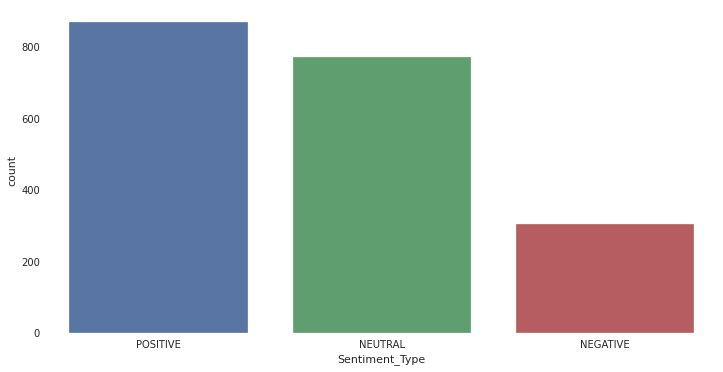

In [126]:
plt.figure(figsize=(12,6))
sns.countplot(x='Sentiment_Type',data=Com1_all)

In [127]:
fig = go.Figure(go.Funnelarea(
    text =temp2.Sentiment_Type,
    values = temp2.clean_Text,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

In [128]:
Com1_all2 = Com1_all.copy()

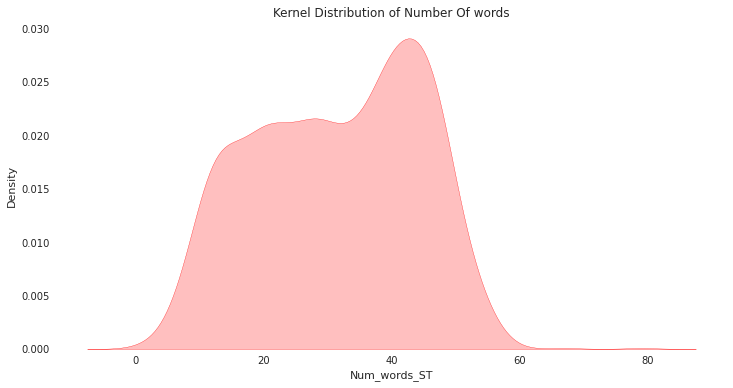

In [129]:
Com1_all2['Num_words_ST'] = Com1_all['Text'].apply(lambda x:len(str(x).split()))
plt.figure(figsize=(12,6))
p1=sns.kdeplot(Com1_all2['Num_words_ST'], shade=True, color="r").set_title('Kernel Distribution of Number Of words')

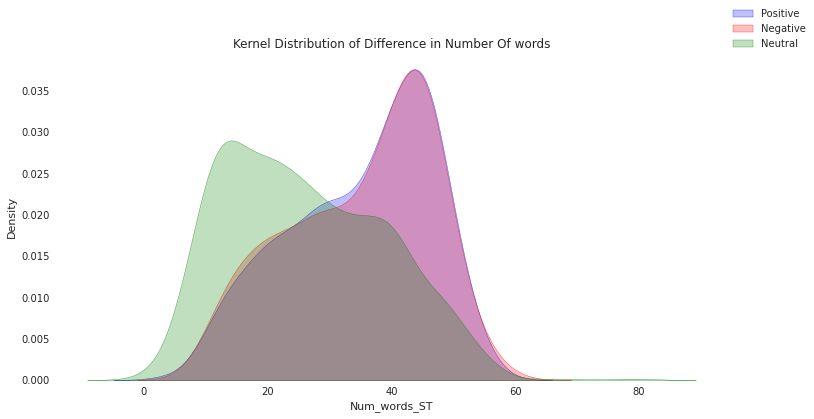

In [130]:
Com1_all2.columns = ['Text','Com','clean_Text','Polarity','sentiment','Num_words_ST']
fig = plt.figure(figsize=(12,6))
p1=sns.kdeplot(Com1_all2[Com1_all2['sentiment']=='POSITIVE']['Num_words_ST'], shade=True, color="b").set_title('Kernel Distribution of Difference in Number Of words')
p2=sns.kdeplot(Com1_all2[Com1_all2['sentiment']=='NEGATIVE']['Num_words_ST'], shade=True, color="r")
p3=sns.kdeplot(Com1_all2[Com1_all2['sentiment']=='NEUTRAL']['Num_words_ST'], shade=True, color="g")
fig.legend(labels=["Positive",'Negative','Neutral'])

# 6. Community2

In [131]:
Com2_all.head()

Text  \
0                                                                     #aşı #AsıYanetki #asımağdurları #ZorunluAsıyaHayır #BioNTechpfizer #Biontech #sinovac #sinovacvaccine #mRNA  https://t.co/nNc7azPcLU   
1                                                                                                                Sinovac Vaccine Falls Short of Expectations, But Options Limited  https://t.co/cm7o73LzQC   
4  @DOHgovph Hello, good morning. Is it possible to have different brands of vaccine na ituturok? Like Sinovac 1st dose, and 2nd dose is another brand? Considering that person is in another LGU for 2...   
5                                                                             HSA begins review of Sinovac Covid-19 vaccine for use in Singapore, asks Chinese firm for more data  https://t.co/6kQjDauLhB   
7  There were recent outbreaks in countries with high Sinopharm/Sinovac vaccination rates eg. Mongolia, Seychelles, Chile  However there are too many variables that could account for this eg. *varian...   

   Com  \
0    1   
1    1   
4    1   
5    1   
7    1   

                                                                                                                                                                                                clean_Text  
0                                                                                                                                                                                                           
1                                                                                                                                               Sinovac Vaccine Falls Sho Expectations But Options Limited  
4                       Hello good morning Is possible different brands vaccine na ituturok Like Sinovac 1st dose 2nd dose another brand Considering person another LGU 2nd dose available vaccine Sinovac  
5                                                                                                                           HSA begins review Sinovac Covid19 vaccine use Singapore asks Chinese firm data  
7  There recent outbreaks countries high SinopharmSinovac vaccination rates eg Mongolia Seychelles Chile However many variables could account eg variants ineffective PH measures etc nothing vaccine e...

In [132]:
Com2 = Com2_all.drop(columns=['Text'])

## 6.1 Perform TF-IDF for each word

In [133]:
df_com2 = TF_IDF(Com2)

In [134]:
df_com2.head()

weight
vaccine   169.880379
sinovac   160.978903
covid19    90.753122
vaccines   81.795176
chinas     67.884895

In [135]:
df_com2.reset_index(level=0, inplace=True)
df_com2.head()

index      weight
0   vaccine  169.880379
1   sinovac  160.978903
2   covid19   90.753122
3  vaccines   81.795176
4    chinas   67.884895

In [136]:
df_com2.columns=['Word','Weight']
df_com2.head()

Word      Weight
0   vaccine  169.880379
1   sinovac  160.978903
2   covid19   90.753122
3  vaccines   81.795176
4    chinas   67.884895

## 6.2 Sentiment Analysis for each word

In [137]:
df_com2['Polarity'] = df_com2['Word'].apply(get_polarity)

In [138]:
df_com2

Word      Weight  Polarity
0      vaccine  169.880379       0.0
1      sinovac  160.978903       0.0
2      covid19   90.753122       0.0
3     vaccines   81.795176       0.0
4       chinas   67.884895       0.0
...        ...         ...       ...
8326       xin    0.127708       0.0
8327      trnh    0.127708       0.0
8328     rahul    0.124692       0.0
8329    gandhi    0.124692       0.0
8330       mou    0.124692       0.0

[8331 rows x 3 columns]

### 6.2.1 Sentiment for word

In [139]:
df_com2['Sentiment_Type']=''
df_com2.loc[df_com2.Polarity>0,'Sentiment_Type']='POSITIVE'
df_com2.loc[df_com2.Polarity==0,'Sentiment_Type']='NEUTRAL'
df_com2.loc[df_com2.Polarity<0,'Sentiment_Type']='NEGATIVE'

In [140]:
Pos2 = df_com2.loc[df_com2.Sentiment_Type=='POSITIVE'][0:100]
Neg2 = df_com2.loc[df_com2.Sentiment_Type=='NEGATIVE'][0:100]
Neu2 = df_com2.loc[df_com2.Sentiment_Type=='NEUTRAL'][1:101]

In [141]:
Pos2 = Pos2[['Word','Weight']]
Neg2 = Neg2[['Word','Weight']]
Neu2 = Neu2[['Word','Weight']]

In [142]:
Pos2.to_csv('/content/drive/MyDrive/CS5344_WordCloud/s1/mention/com2/pos.csv') 
Neg2.to_csv('/content/drive/MyDrive/CS5344_WordCloud/s1/mention/com2/neg.csv') 
Neu2.to_csv('/content/drive/MyDrive/CS5344_WordCloud/s1/mention/com2/neu.csv')

### 6.2.2 Sentiment for tweet

In [143]:
Com2_all['Polarity'] = Com2_all['clean_Text'].apply(get_polarity)

In [144]:
Com2_all['Sentiment_Type']=''
Com2_all.loc[Com2_all.Polarity>0,'Sentiment_Type']='POSITIVE'
Com2_all.loc[Com2_all.Polarity==0,'Sentiment_Type']='NEUTRAL'
Com2_all.loc[Com2_all.Polarity<0,'Sentiment_Type']='NEGATIVE'

## 6.3 Analyze the Polarity information

### 6.3.1 For Word

In [145]:
temp = df_com2.groupby('Sentiment_Type').count()['Word'].reset_index().sort_values(by='Word',ascending=False)
temp.style.background_gradient(cmap='Purples')

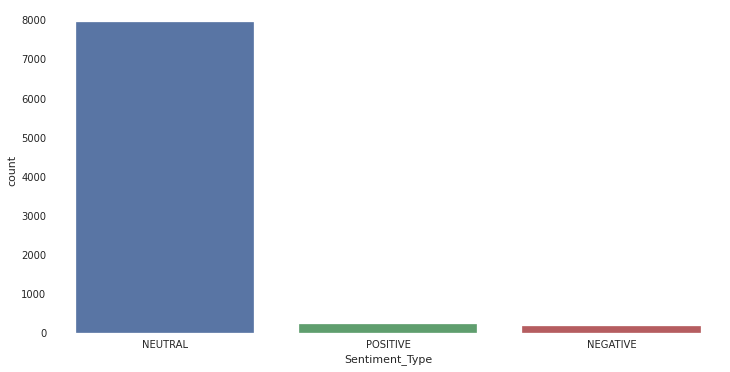

In [146]:
plt.figure(figsize=(12,6))
sns.countplot(x='Sentiment_Type',data=df_com2)

In [147]:
fig = go.Figure(go.Funnelarea(
    text =temp.Sentiment_Type,
    values = temp.Word,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

In [148]:
df_com2['Num_words_ST'] = Com2_all['Text'].apply(lambda x:len(str(x).split()))

In [149]:
df2 = df_com2.copy()

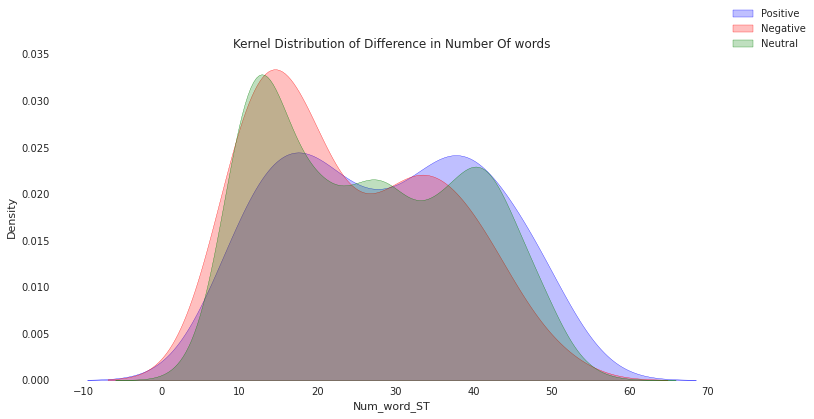

In [150]:
df2.columns=['Word','Weight','Polarity','sentiment','Num_word_ST']
fig = plt.figure(figsize=(12,6))
p1=sns.kdeplot(df2[df2['sentiment']=='POSITIVE']['Num_word_ST'], shade=True, color="b",legend=True).set_title('Kernel Distribution of Difference in Number Of words')
p2=sns.kdeplot(df2[df2['sentiment']=='NEGATIVE']['Num_word_ST'], shade=True, color="r",legend=True)
p3=sns.kdeplot(df2[df2['sentiment']=='NEUTRAL']['Num_word_ST'], shade=True, color="g",legend=True)
fig.legend(labels=["Positive",'Negative','Neutral'])

### 6.3.2 For tweet

In [151]:
temp2 = Com2_all.groupby('Sentiment_Type').count()['clean_Text'].reset_index().sort_values(by='clean_Text',ascending=False)
temp2.style.background_gradient(cmap='Purples')

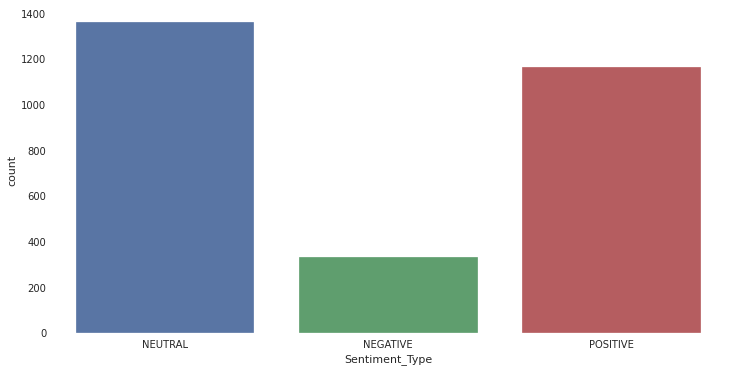

In [152]:
plt.figure(figsize=(12,6))
sns.countplot(x='Sentiment_Type',data=Com2_all)

In [153]:
fig = go.Figure(go.Funnelarea(
    text =temp2.Sentiment_Type,
    values = temp2.clean_Text,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

In [154]:
Com2_all2 = Com2_all.copy()

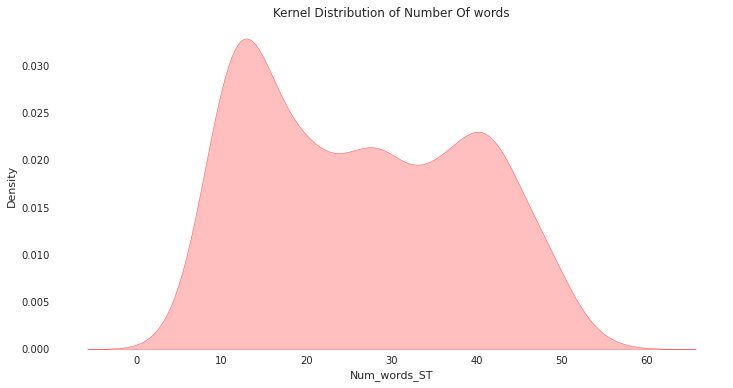

In [155]:
Com2_all2['Num_words_ST'] = Com2_all['Text'].apply(lambda x:len(str(x).split()))
plt.figure(figsize=(12,6))
p1=sns.kdeplot(Com2_all2['Num_words_ST'], shade=True, color="r").set_title('Kernel Distribution of Number Of words')

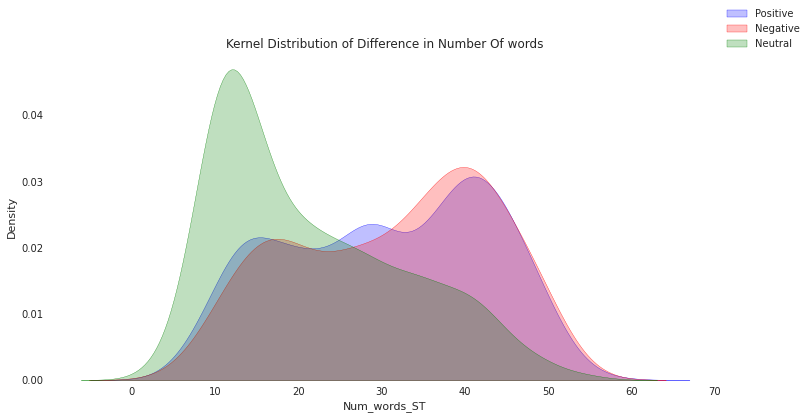

In [156]:
Com2_all2.columns = ['Text','Com','clean_Text','Polarity','sentiment','Num_words_ST']
fig = plt.figure(figsize=(12,6))
p1=sns.kdeplot(Com2_all2[Com2_all2['sentiment']=='POSITIVE']['Num_words_ST'], shade=True, color="b").set_title('Kernel Distribution of Difference in Number Of words')
p2=sns.kdeplot(Com2_all2[Com2_all2['sentiment']=='NEGATIVE']['Num_words_ST'], shade=True, color="r")
p3=sns.kdeplot(Com2_all2[Com2_all2['sentiment']=='NEUTRAL']['Num_words_ST'], shade=True, color="g")
fig.legend(labels=["Positive",'Negative','Neutral'])